In [ ]:
import os
import cv2
import random
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('drive',force_remount=True)

Mounted at drive


In [ ]:
!unzip drive/MyDrive/Datasets/COVID-19_X-ray-Dataset.zip
clear_output()

In [ ]:
root = "COVID-19_X-ray-Dataset/"
classes = os.listdir(root)
classes

['COVID', 'Viral Pneumonia', 'Normal']

In [ ]:
sampleData = []
for cat in classes:
  filenames = os.listdir(root+cat)
  random.shuffle(filenames)
  files = filenames[:4]
  sampleData.append(files)

In [ ]:
sampleLungs = []

for i,sub in enumerate(sampleData):
  cat = []
  for filename in sub:
    file = cv2.resize(cv2.imread((root+classes[i]+"/"+filename)),(512,512))
    cat.append(file)
  sampleLungs.append(cat)

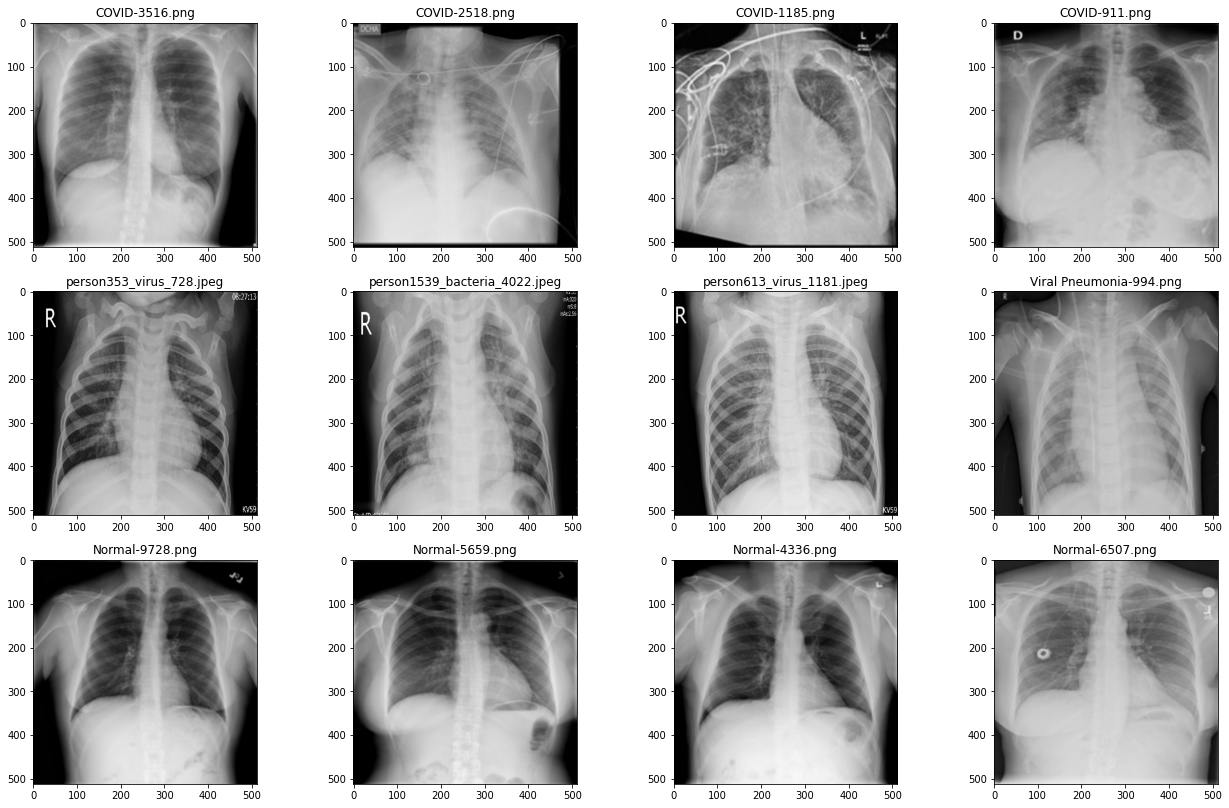

In [ ]:
plt.figure(figsize=(22,14))
e = 1
for cat,catname,c in zip(sampleLungs, sampleData, classes):
  for img,fname in zip(cat,catname):
    plt.subplot(3,4,e)
    plt.imshow(img)
    plt.title(fname)
    e += 1

In [ ]:
img_names = []
for i in classes:
  filenames = glob(root+i+"/*")
  img_names.append(filenames)

In [ ]:
def readImgs(files, X_shape):
    im_array = []
    for i in tqdm(files): 
        im = cv2.resize(cv2.imread(i), (X_shape,X_shape))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_array.append(im)

    return im_array

In [ ]:
img_array = []
for i in img_names:
  imgs = readImgs(i, 512)
  img_array.append(imgs)
  del imgs     # To prevent RAM exhaustion

100%|██████████| 5712/5712 [00:19<00:00, 298.87it/s]


In [ ]:
img_array[2][100].shape

(512, 512)

In [ ]:
COVID_XRAY = np.array(img_array[0]).reshape(len(img_array[0]),512,512,1)
PNEUMONIA_XRAY = np.array(img_array[1]).reshape(len(img_array[1]),512,512,1)
NORMAL_XRAY = np.array(img_array[2]).reshape(len(img_array[2]),512,512,1)

In [ ]:
print(COVID_XRAY.shape)
print(PNEUMONIA_XRAY.shape)
print(NORMAL_XRAY.shape)

(4294, 512, 512, 1)
(5220, 512, 512, 1)
(5712, 512, 512, 1)


In [ ]:
print(COVID_XRAY.max(),COVID_XRAY.min())
print(PNEUMONIA_XRAY.max(),PNEUMONIA_XRAY.min())
print(NORMAL_XRAY.max(),NORMAL_XRAY.min())

255 0
255 0
255 0


### Saving to disk to prevent RAM exhaustion

In [ ]:
COVID_XRAY1 = COVID_XRAY[:1100]
COVID_XRAY2 = COVID_XRAY[1100:2200]
COVID_XRAY3 = COVID_XRAY[2200:3300]
COVID_XRAY4 = COVID_XRAY[3300:]
del COVID_XRAY
np.save("covid_xray1.npy",COVID_XRAY1)
np.save("covid_xray2.npy",COVID_XRAY2)
np.save("covid_xray3.npy",COVID_XRAY3)
np.save("covid_xray4.npy",COVID_XRAY4)
del COVID_XRAY1
del COVID_XRAY2
del COVID_XRAY3
del COVID_XRAY4

In [ ]:
PNEUMONIA_XRAY1 = PNEUMONIA_XRAY[:1100]
PNEUMONIA_XRAY2 = PNEUMONIA_XRAY[1100:2200]
PNEUMONIA_XRAY3 = PNEUMONIA_XRAY[2200:3300]
PNEUMONIA_XRAY4 = PNEUMONIA_XRAY[3300:4400]
PNEUMONIA_XRAY5 = PNEUMONIA_XRAY[4400:]
del PNEUMONIA_XRAY
np.save("pneumonia_xray1.npy",PNEUMONIA_XRAY1)
np.save("pneumonia_xray2.npy",PNEUMONIA_XRAY2)
np.save("pneumonia_xray3.npy",PNEUMONIA_XRAY3)
np.save("pneumonia_xray4.npy",PNEUMONIA_XRAY4)
np.save("pneumonia_xray5.npy",PNEUMONIA_XRAY5)
del PNEUMONIA_XRAY1
del PNEUMONIA_XRAY2
del PNEUMONIA_XRAY3
del PNEUMONIA_XRAY4
del PNEUMONIA_XRAY5

In [ ]:
NORMAL_XRAY1 = NORMAL_XRAY[:1100]
NORMAL_XRAY2 = NORMAL_XRAY[1100:2200]
NORMAL_XRAY3 = NORMAL_XRAY[2200:3300]
NORMAL_XRAY4 = NORMAL_XRAY[3300:4400]
NORMAL_XRAY5 = NORMAL_XRAY[4400:]
del NORMAL_XRAY
np.save("normal_xray1.npy",NORMAL_XRAY1)
np.save("normal_xray2.npy",NORMAL_XRAY2)
np.save("normal_xray3.npy",NORMAL_XRAY3)
np.save("normal_xray4.npy",NORMAL_XRAY4)
np.save("normal_xray5.npy",NORMAL_XRAY5)
del NORMAL_XRAY1
del NORMAL_XRAY2
del NORMAL_XRAY3
del NORMAL_XRAY4
del NORMAL_XRAY5

In [ ]:
del img_array

In [ ]:
COVID_XRAY1 = np.load("covid_xray1.npy")
COVID_XRAY1 = (COVID_XRAY1-127.0)/127.0
np.save("covid_xray1_norm.npy",COVID_XRAY1.astype(np.float32))
del COVID_XRAY1

In [ ]:
COVID_XRAY2 = np.load("covid_xray2.npy")
COVID_XRAY2 = (COVID_XRAY2-127.0)/127.0
np.save("covid_xray2_norm.npy",COVID_XRAY2.astype(np.float32))
del COVID_XRAY2

In [ ]:
COVID_XRAY3 = np.load("covid_xray3.npy")
COVID_XRAY3 = (COVID_XRAY3-127.0)/127.0
np.save("covid_xray3_norm.npy",COVID_XRAY3.astype(np.float32))
del COVID_XRAY3

In [ ]:
COVID_XRAY4 = np.load("covid_xray4.npy")
COVID_XRAY4 = (COVID_XRAY4-127.0)/127.0
np.save("covid_xray4_norm.npy",COVID_XRAY4.astype(np.float32))
del COVID_XRAY4

In [ ]:
!rm covid_xray1.npy
!rm covid_xray2.npy
!rm covid_xray3.npy
!rm covid_xray4.npy

In [ ]:
PNEUMONIA_XRAY1 = np.load("pneumonia_xray1.npy")
PNEUMONIA_XRAY1 = (PNEUMONIA_XRAY1-127.0)/127.0
np.save("pneumonia_xray1_norm.npy",PNEUMONIA_XRAY1.astype(np.float32))
del PNEUMONIA_XRAY1

In [ ]:
PNEUMONIA_XRAY2 = np.load("pneumonia_xray2.npy")
PNEUMONIA_XRAY2 = (PNEUMONIA_XRAY2-127.0)/127.0
np.save("pneumonia_xray2_norm.npy",PNEUMONIA_XRAY2.astype(np.float32))
del PNEUMONIA_XRAY2

In [ ]:
PNEUMONIA_XRAY3 = np.load("pneumonia_xray3.npy")
PNEUMONIA_XRAY3 = (PNEUMONIA_XRAY3-127.0)/127.0
np.save("pneumonia_xray3_norm.npy",PNEUMONIA_XRAY3.astype(np.float32))
del PNEUMONIA_XRAY3

In [ ]:
PNEUMONIA_XRAY4 = np.load("pneumonia_xray4.npy")
PNEUMONIA_XRAY4 = (PNEUMONIA_XRAY4-127.0)/127.0
np.save("pneumonia_xray4_norm.npy",PNEUMONIA_XRAY4.astype(np.float32))
del PNEUMONIA_XRAY4

In [ ]:
PNEUMONIA_XRAY5 = np.load("pneumonia_xray5.npy")
PNEUMONIA_XRAY5 = (PNEUMONIA_XRAY5-127.0)/127.0
np.save("pneumonia_xray5_norm.npy",PNEUMONIA_XRAY5.astype(np.float32))
del PNEUMONIA_XRAY5

In [ ]:
!rm pneumonia_xray1.npy
!rm pneumonia_xray2.npy
!rm pneumonia_xray3.npy
!rm pneumonia_xray4.npy
!rm pneumonia_xray5.npy

In [ ]:
NORMAL_XRAY1 = np.load("normal_xray1.npy")
NORMAL_XRAY1 = (NORMAL_XRAY1-127.0)/127.0
np.save("normal_xray1_norm.npy",NORMAL_XRAY1.astype(np.float32))
del NORMAL_XRAY1

In [ ]:
NORMAL_XRAY2 = np.load("normal_xray2.npy")
NORMAL_XRAY2 = (NORMAL_XRAY2-127.0)/127.0
np.save("normal_xray2_norm.npy",NORMAL_XRAY2.astype(np.float32))
del NORMAL_XRAY2

In [ ]:
NORMAL_XRAY3 = np.load("normal_xray3.npy")
NORMAL_XRAY3 = (NORMAL_XRAY3-127.0)/127.0
np.save("normal_xray3_norm.npy",NORMAL_XRAY3.astype(np.float32))
del NORMAL_XRAY3

In [ ]:
NORMAL_XRAY4 = np.load("normal_xray4.npy")
NORMAL_XRAY4 = (NORMAL_XRAY4-127.0)/127.0
np.save("normal_xray4_norm.npy",NORMAL_XRAY4.astype(np.float32))
del NORMAL_XRAY4

In [ ]:
NORMAL_XRAY5 = np.load("normal_xray5.npy")
NORMAL_XRAY5 = (NORMAL_XRAY5-127.0)/127.0
np.save("normal_xray5_norm.npy",NORMAL_XRAY5.astype(np.float32))
del NORMAL_XRAY5

In [ ]:
!rm normal_xray1.npy
!rm normal_xray2.npy
!rm normal_xray3.npy
!rm normal_xray4.npy
!rm normal_xray5.npy

In [ ]:
!rm -rf COVID-19_X-ray-Dataset

###Custom Loss for segmentation

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
model = load_model("drive/MyDrive/Lung_Segmentation_Weights/best_model_lungs_segmentation.h5", custom_objects={'dice_coef':dice_coef, 'dice_coef_loss':dice_coef_loss})

In [ ]:
gpus = tf.config.experimental.list_logical_devices("GPU")
if len(gpus) > 1:
  strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
  print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on single GPU ', gpus[0].name)
else:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on single GPU  /device:GPU:0
Number of accelerators:  1


In [ ]:
covid_xray1_norm = np.load("covid_xray1_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(covid_xray1_norm)

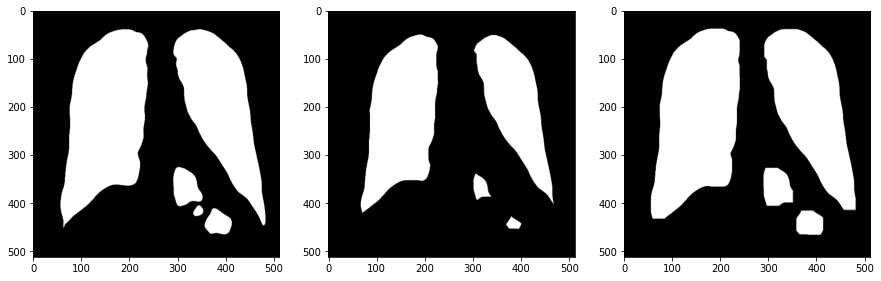

In [ ]:
i=27
img = np.squeeze(covid_xray1_norm[i])
mask = np.squeeze(pred[i])
mask2 = mask.copy()*255
ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
pmask = cv2.erode(mask2, ekernal)
fmask = cv2.dilate(pmask, dkernal)

plt.figure(figsize=(15,13))
plt.subplot(1,3,1)
plt.imshow(mask2, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(pmask, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(fmask, cmap="gray")

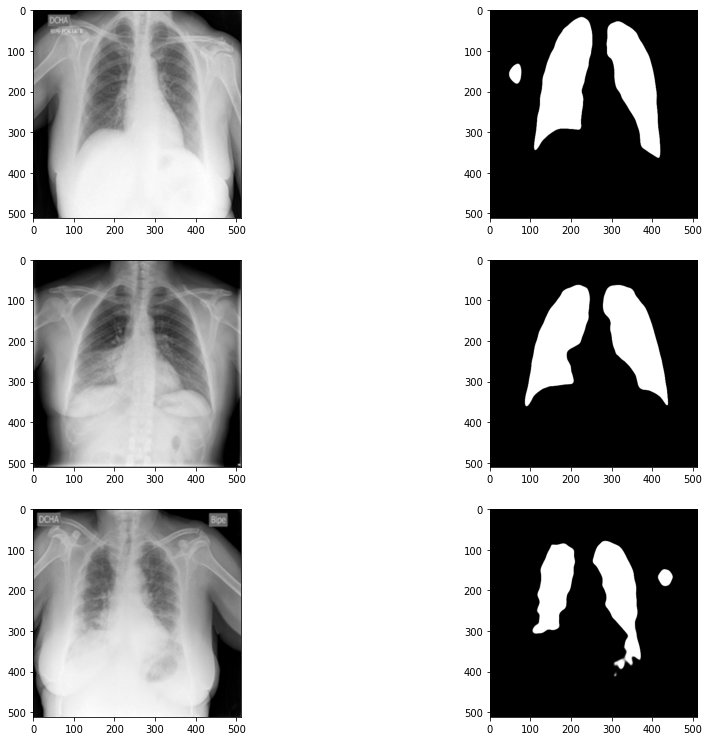

In [ ]:
plt.figure(figsize=(15,13))

plt.subplot(3,2,1)
plt.imshow(np.squeeze(covid_xray1_norm[12]), cmap="gray")
plt.subplot(3,2,2)
plt.imshow(np.squeeze(pred[12]), cmap="gray")

plt.subplot(3,2,3)
plt.imshow(np.squeeze(covid_xray1_norm[45]), cmap="gray")
plt.subplot(3,2,4)
plt.imshow(np.squeeze(pred[45]), cmap="gray")

plt.subplot(3,2,5)
plt.imshow(np.squeeze(covid_xray1_norm[87]), cmap="gray")
plt.subplot(3,2,6)
plt.imshow(np.squeeze(pred[87]), cmap="gray")

In [ ]:
seg = np.zeros((512,512))

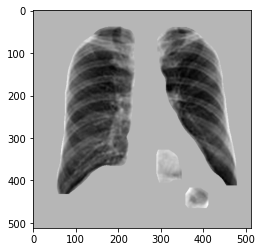

In [ ]:
seg[fmask>245] = img[fmask>245]
plt.imshow(seg, cmap="gray")

In [ ]:
img2 = (img*127)+127

In [ ]:
img2.min()

0.0

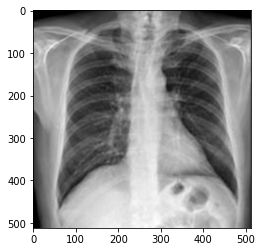

In [ ]:
plt.imshow(img2,cmap="gray")

In [ ]:
!mkdir segmented_lungs

In [ ]:
!mkdir segmented_lungs/COVID
!mkdir segmented_lungs/PNEUMONIA
!mkdir segmented_lungs/NORMAL

In [ ]:
root2 = "segmented_lungs/"

In [ ]:
# kernal = np.ones([20,20])
# for img,mask in tqdm(zip(covid_xray1_norm, pred)):
#   img = (np.squeeze(img)*127)+127
#   mask = np.squeeze(mask)*255
#   mask = cv2.erode(mask, kernal)
#   mask = cv2.dilate(mask, kernal)
#   seg = np.zeros((512,512))
#   seg[mask>245] = img[mask>245]
#   cv2.imwrite(f"{root2}{cat}COVID_{i}.jpg", seg)
#   i += 1

In [ ]:
del covid_xray1_norm
del pred

In [ ]:
cat = "COVID/"
i=0

In [ ]:
covid_xray_np = np.load("covid_xray1_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(covid_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(covid_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}COVID_{i}.jpg", seg)
  i += 1
del covid_xray_np
del pred
!rm covid_xray1_norm.npy

1100it [00:08, 132.67it/s]


In [ ]:
del covid_xray_np

In [ ]:
covid_xray_np = np.load("covid_xray2_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(covid_xray_np, batch_size=55)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(covid_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}COVID_{i}.jpg", seg)
  i += 1
del covid_xray_np
del pred
!rm covid_xray2_norm.npy

KeyboardInterrupt: ignored

In [ ]:
covid_xray_np = np.load("covid_xray3_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(covid_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(covid_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}COVID_{i}.jpg", seg)
  i += 1
del covid_xray_np
del pred
!rm covid_xray3_norm.npy

In [ ]:
covid_xray_np = np.load("covid_xray4_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(covid_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(covid_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}COVID_{i}.jpg", seg)
  i += 1
del covid_xray_np
del pred
!rm covid_xray4_norm.npy

In [ ]:
cat = "PNEUMONIA/"
i=0

In [ ]:
pneumonia_xray_np = np.load("pneumonia_xray1_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(pneumonia_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(pneumonia_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}PNEUMONIA_{i}.jpg", seg)
  i += 1
del pneumonia_xray_np
del pred
!rm pneumonia_xray1_norm.npy

1100it [00:07, 142.08it/s]


In [ ]:
pneumonia_xray_np = np.load("pneumonia_xray2_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(pneumonia_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(pneumonia_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}PNEUMONIA_{i}.jpg", seg)
  i += 1
del pneumonia_xray_np
del pred
!rm pneumonia_xray2_norm.npy

1100it [00:08, 137.49it/s]


In [ ]:
pneumonia_xray_np = np.load("pneumonia_xray3_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(pneumonia_xray_np,batch_size=137)  # Added batch_size to counter ResourceExhaustedError

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(pneumonia_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}PNEUMONIA_{i}.jpg", seg)
  i += 1
del pneumonia_xray_np
del pred
!rm pneumonia_xray3_norm.npy

In [ ]:
pneumonia_xray_np = np.load("pneumonia_xray4_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(pneumonia_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(pneumonia_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}PNEUMONIA_{i}.jpg", seg)
  i += 1
del pneumonia_xray_np
del pred
!rm pneumonia_xray4_norm.npy

In [ ]:
pneumonia_xray_np = np.load("pneumonia_xray5_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(pneumonia_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(pneumonia_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}PNEUMONIA_{i}.jpg", seg)
  i += 1
del pneumonia_xray_np
del pred
!rm pneumonia_xray5_norm.npy

In [ ]:
cat = "NORMAL/"
i=0

In [ ]:
normal_xray_np = np.load("normal_xray1_norm.npy")
with tf.device("/device:GPU:0"):
  pred = model.predict(normal_xray_np)

ekernal = np.ones([20,20])
dkernal = np.ones([25,25])
for img,mask in tqdm(zip(normal_xray_np, pred)):
  img = (np.squeeze(img)*127)+127
  mask = np.squeeze(mask)*255
  mask = cv2.erode(mask, ekernal)
  mask = cv2.dilate(mask, dkernal)
  seg = np.zeros((512,512))
  seg[mask>245] = img[mask>245]
  cv2.imwrite(f"{root2}{cat}NORMAL_{i}.jpg", seg)
  i += 1
del normal_xray_np
del pred
!rm normal_xray5_norm.npy

In [ ]:
len(os.listdir("segmented_lungs/PNEUMONIA/"))

2200

In [ ]:
!ls

covid_xray2_norm.npy   normal_xray3_norm.npy	 pneumonia_xray4_norm.npy
covid_xray3_norm.npy   normal_xray4_norm.npy	 pneumonia_xray5_norm.npy
covid_xray4_norm.npy   normal_xray5_norm.npy	 sample_data
drive		       pneumonia_xray1_norm.npy  segmented_lungs
normal_xray1_norm.npy  pneumonia_xray2_norm.npy
normal_xray2_norm.npy  pneumonia_xray3_norm.npy


In [ ]:
from google.colab import files

In [ ]:
!cp covid_xray1_norm.npy drive/MyDrive/lungsnpshare/covid_xray1_norm.npy
!cp covid_xray2_norm.npy drive/MyDrive/lungsnpshare/covid_xray2_norm.npy

In [ ]:
!cp covid_xray3_norm.npy drive/MyDrive/lungsnpshare/covid_xray3_norm.npy
!cp covid_xray4_norm.npy drive/MyDrive/lungsnpshare/covid_xray4_norm.npy

In [ ]:
!cp pneumonia_xray1_norm.npy drive/MyDrive/lungsnpshare/pneumonia_xray1_norm.npy
!cp pneumonia_xray2_norm.npy drive/MyDrive/lungsnpshare/pneumonia_xray2_norm.npy

In [ ]:
!cp pneumonia_xray3_norm.npy drive/MyDrive/lungsnpshare/pneumonia_xray3_norm.npy
!cp pneumonia_xray4_norm.npy drive/MyDrive/lungsnpshare/pneumonia_xray4_norm.npy
!cp pneumonia_xray5_norm.npy drive/MyDrive/lungsnpshare/pneumonia_xray5_norm.npy

In [ ]:
!cp normal_xray1_norm.npy drive/MyDrive/lungsnpshare/normal_xray1_norm.npy
!cp normal_xray2_norm.npy drive/MyDrive/lungsnpshare/normal_xray2_norm.npy

In [ ]:
!cp normal_xray3_norm.npy drive/MyDrive/lungsnpshare/normal_xray3_norm.npy
!cp normal_xray4_norm.npy drive/MyDrive/lungsnpshare/normal_xray4_norm.npy
!cp normal_xray5_norm.npy drive/MyDrive/lungsnpshare/normal_xray5_norm.npy